In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from mnist import MNIST
from sklearn.preprocessing import OneHotEncoder
#import tensorflow_datasets as tfds

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
def load_data():
    """
    loads data from local folder Data/.
    converts the array.array objects to numpy ndarrays
    """
    mndata = MNIST('./Data')
    train_X, train_Y = mndata.load_training()
    test_X, test_Y = mndata.load_testing()
    train_X =np.asarray(train_X)
    test_X = np.asarray(test_X)
    train_Y = np.asarray(train_Y)
    test_Y = np.asarray(test_Y)
    return train_X, train_Y, test_X, test_Y

In [3]:
def preprocess_image_data(image_data):
    """
    takes in an array object that is assumed to be X image data for MNIST.
    reshape to get grayscale 28x28 images for each row.
    converts array to float and normalizes values betweeen 0 and 1
    
    param image_data: a array.array object that is training or test data
    return image_array_norm: normalized image array
    """
    image_array = np.reshape(image_data, (image_data.shape[0], 28, 28, 1))
    image_array = image_array.astype(np.float32)
    image_array_norm = image_array / 255.0
    return image_array_norm

In [4]:
def preprocess_label_data(label_data):
    """
    takes in an array object and reshapes to 2D array. 
    One hot encodes labels since they are categorical.
    
    param label_data: label data
    return encoded_labels: (-1,10) array of encoded data labels
    """
    label_array = label_data.reshape(-1, 1)
    hot_encoder = OneHotEncoder(dtype=np.uint8)
    hot_encoder.fit(label_array)
    encoded_labels = hot_encoder.transform(label_array).toarray()
    return encoded_labels

In [5]:
# load MNIST data set
Xtrain, Ytrain, Xtest, Ytest = load_data()

In [6]:
# find out if dataset is balanced 
def visualize_balance_of_dataset(y):
    """
    output bar chart showing number of elements
    for multiclass (0, 1, 2,...9). 
    
    Used to visualize how balanced the data set is. 
    
    param y: label array
    """
    u, counts = np.unique(Ytrain, return_counts=True)
    plt.figure(figsize=(10, 5))
    plt.bar(u, counts, color='blue')

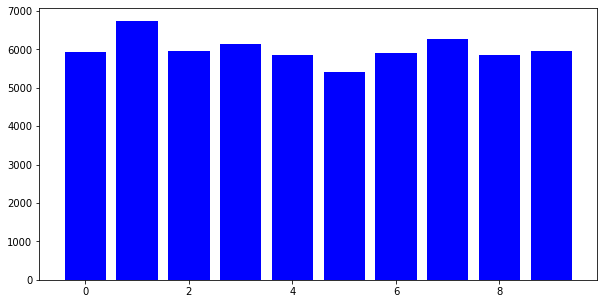

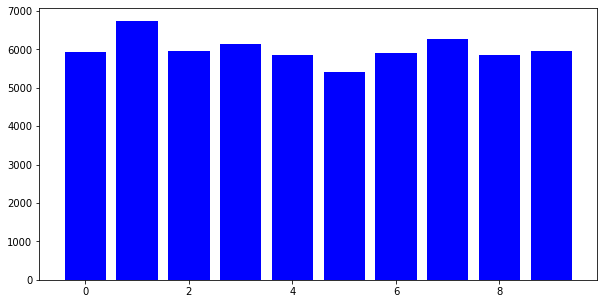

In [7]:
visualize_balance_of_dataset(Ytrain)
visualize_balance_of_dataset(Ytest)

# Preprocess training and test input data
Xtrain = preprocess_image_data(Xtrain)
Xtest = preprocess_image_data(Xtest)

In [8]:
# preprocess training and test labels 
Ytrain = preprocess_label_data(Ytrain)
Ytest = preprocess_label_data(Ytest)

In [9]:

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


In [10]:
def create_CNNmodel():
    
    # add layers for CNN
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
def split_train_evaluate(Xtrain, Ytrain):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    for i, j in kfold.split(Xtrain, Ytrain):
        Xtrain_fold, Ytrain_fold = Xtrain[i], Ytrain[i]
        XVal_fold, YVal_fold = Xtrain[j], Ytrain[j]
        cnn = create_CNNmodel()
        history = model.fit(Xtrain_fold, Ytrain_fold, epochs=10, batch_size=32, validation_data=(XVal_fold, YVal_fold), verbose=0)
        _, acc = model.evaluate(XVal_fold, YVal_fold, verbose=0)
        print('> %.3f' % (acc * 100.0))